In [3]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
nlp = spacy.load('en_core_web_sm')
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

     |████████████████████████████████| 1.7 MB 13.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 553 kB/s 
     |████████████████████████████████| 11.3 MB 58.9 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=59b49d6991ee19c87415634be45639b67a2ed50c7e403a6765c3866c2d8b4a7b
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take in

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [4]:
from matplotlib import pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import Counter
import plotly.tools as tls
import plotly.graph_objs as go
import base64
import numpy as np
import pandas as pd

import plotly.offline as py
py.init_notebook_mode(connected=True)

%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/data/new cleaned tweets.csv', lineterminator='\n')

In [ ]:
df.isna().sum()

Unnamed: 0      0
Text          126
dtype: int64

In [ ]:
df.shape

(61356, 2)

In [ ]:
df.head()

,Unnamed: 0,Text
0,0,"and ' today 9november2021 , 4pm , , second sun..."
1,1,What is the plan for which are causing because...
2,2,"Also , already faced Hud Hud . is flood prone ..."
3,3,11 the Time When saw & ; also the Time when we...
4,4,""" like the / are going to be round the year no..."


In [7]:
df.rename(columns={'0': 'ct'}, inplace=True)

In [8]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])

In [9]:
df['Text'] = df['Text'].apply(lambda x: remove_stopwords(x))

In [10]:
df['Text']

0        ' today 9november2021 , 4pm , , second sun war...
1         What plan causing heavy , climate change worse .
2        Also , faced Hud Hud . flood prone ani baga tr...
3        11 Time When saw & ; Time Busy Begging ... Sai...
4        " like / going round year ... ... ... ... ... ...
                               ...                        
61351                             Watching - Flood Nat Geo
61352    flood documentary days citizen journalism . ' ...
61353    went national geographic : real . story . bett...
61354    Flood : , , . Is Flood2 . 0 Urban Planning0 . ...
61355    Dawn mud raise monsoon death toll western 75 :...
Name: Text, Length: 61356, dtype: object

In [11]:
text=df.Text.values.tolist()

In [12]:
sent=['I am Potato', ' you are Potato']
vec=CountVectorizer(min_df=0)
trans = vec.fit_transform(sent)

In [13]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i]
                            for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print("="*70)

In [14]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()

class LemmaCountVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))


In [15]:
import nltk
nltk.download('wordnet')
tf_vectorizer = LemmaCountVectorizer(max_df=0.95,
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [17]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=10)

In [18]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=11, random_state=10)

In [19]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:flood 26th toll death time rain twitter video watch financial north face read count report low 14 crisis june vulnerability news live 24 people lying usual today east day monsoon check cover south like pic bomb heavy weary go scary

Topic #1:spirit tide latest warning sea thane flood pray donate service love cut attention little search navy breaking humanity heat worry donated record collection dying swimming 60 pouring power maybe quickly eye landslide diving ban time news rain solar people 39

Topic #2:2005 flood year train like tsunami earthquake time city don water traffic rain people thing know day development near rise need better got dry flooded control situation come drainage stop bad single think problem car good going monsoon hope remember

Topic #3:26 flood news attack 12 11 000 200 affected street people relief 10 sacrifice nan support trapped 1000 month toxic learning wish foam 15 05 distributed terrorist turn date killing reach team stand 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [20]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]

In [ ]:
first_topic.shape

(9595,)

In [ ]:
first_topic_words = [tf_feature_names[i]
                     for i in first_topic.argsort()[:-50 - 1:-1]]
second_topic_words = [tf_feature_names[i]
                      for i in second_topic.argsort()[:-50 - 1:-1]]
third_topic_words = [tf_feature_names[i]
                     for i in third_topic.argsort()[:-50 - 1:-1]]
fourth_topic_words = [tf_feature_names[i]
                      for i in fourth_topic.argsort()[:-50 - 1:-1]]


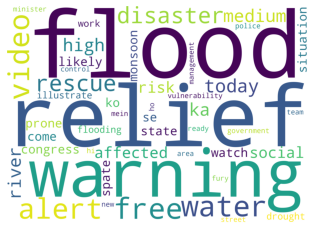

In [ ]:
from wordcloud import WordCloud
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

firstcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    width=2500,
    height=1800
).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()


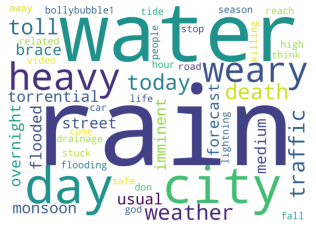

In [ ]:
secondcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    width=2500,
    height=1800
).generate(" ".join(second_topic_words))
plt.imshow(secondcloud)
plt.axis('off')
plt.show()

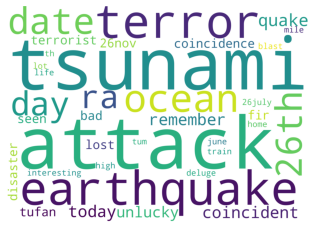

In [ ]:
thirdcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    width=2500,
    height=1800
).generate(" ".join(third_topic_words))
plt.imshow(thirdcloud)
plt.axis('off')
plt.show()

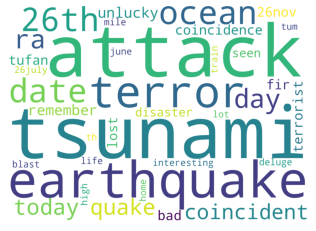

In [ ]:
fourthcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    width=2500,
    height=1800
).generate(" ".join(fourth_topic_words))
plt.imshow(fourthcloud)
plt.axis('off')
plt.show()


NMF

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf = NMF(n_components=10, solver="mu")

W = nmf.fit_transform(tf)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



In [ ]:
W

array([[5.80618483e-04, 1.20652449e-03, 7.39101006e-04, ...,
        3.26997394e-03, 0.00000000e+00, 0.00000000e+00],
       [1.23513012e-16, 8.60319498e-04, 0.00000000e+00, ...,
        5.32216594e-03, 0.00000000e+00, 5.28857445e-02],
       [1.63589009e-02, 0.00000000e+00, 1.57352073e-07, ...,
        2.96823576e-03, 2.54764819e-02, 9.83151463e-11],
       ...,
       [1.06199280e-03, 6.28300159e-04, 2.21178583e-04, ...,
        4.17012638e-03, 0.00000000e+00, 0.00000000e+00],
       [2.60980198e-02, 0.00000000e+00, 2.09275171e-03, ...,
        4.60604368e-04, 2.38250089e-04, 4.05675941e-13],
       [9.52550795e-06, 2.81979326e-03, 4.22399130e-16, ...,
        0.00000000e+00, 1.26021388e-03, 1.62910708e-05]])

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()
n_top_words=10
print_top_words(nmf, tf_feature_names, n_top_words)


Topic #0:flood relief warning free water video alert disaster rescue today

Topic #1:rain water day city heavy weary weather today toll death

Topic #2:26 tsunami attack 11 earthquake 12 2005 terror 2008 ocean

Topic #3:monsoon building south wreak havoc 200 latest worst death rise

Topic #4:people relief affected help fund government food state donate need

Topic #5:news 1000 world train near share medium fake latest twitter

Topic #6:hit region worst struck guardian news terror story nature world

Topic #7:like situation year city water 2005 live day stay flooded

Topic #8:time coping battle half poor new york share financial economic

Topic #9:heavy rainfall lash alert flash video financial downpour high overnight


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
first_topic = nmf.components_[0]
first_topic_words = [tf_feature_names[i]
                     for i in first_topic.argsort()[:-50 - 1:-1]]

second_topic = nmf.components_[1]
second_topic_words = [tf_feature_names[i]
                     for i in second_topic.argsort()[:-50 - 1:-1]]

third_topic = nmf.components_[2]
third_topic_words = [tf_feature_names[i]
                     for i in third_topic.argsort()[:-50 - 1:-1]]


fourth_topic = nmf.components_[3]
fourth_topic_words = [tf_feature_names[i]
                     for i in third_topic.argsort()[:-50 - 1:-1]]


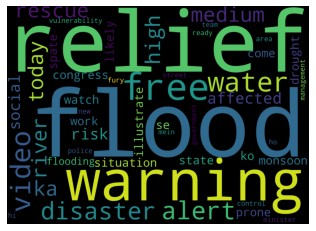

In [ ]:
from wordcloud import WordCloud
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

firstcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=2500,
    height=1800
).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

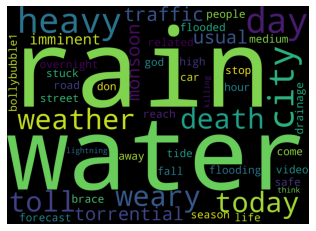

In [ ]:
secondcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=2500,
    height=1800
).generate(" ".join(second_topic_words))
plt.imshow(secondcloud)
plt.axis('off')
plt.show()

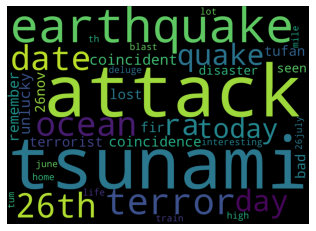

In [ ]:
thirdcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=2500,
    height=1800
).generate(" ".join(third_topic_words))
plt.imshow(thirdcloud)
plt.axis('off')
plt.show()

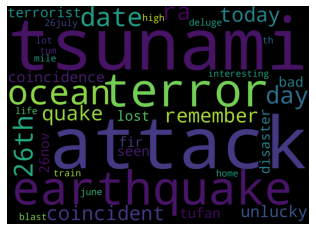

In [ ]:
fourthcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=2500,
    height=1800
).generate(" ".join(fourth_topic_words))
plt.imshow(fourthcloud)
plt.axis('off')
plt.show()

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

In [ ]:
doc_lens = [len(d) for d in .Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [ ]:
pip install sentence-transformers

     |████████████████████████████████| 78 kB 3.0 MB/s 
     |████████████████████████████████| 3.4 MB 38.4 MB/s 
     |████████████████████████████████| 6.8 MB 31.4 MB/s 
     |████████████████████████████████| 1.2 MB 36.3 MB/s 
     |████████████████████████████████| 61 kB 453 kB/s 
     |████████████████████████████████| 895 kB 58.3 MB/s 
     |████████████████████████████████| 3.3 MB 45.4 MB/s 
     |████████████████████████████████| 596 kB 57.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=ea39c4fc10d1e7bf610cece389f8a8fa36693f150c7d22b7bc869123580a8377
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install bertopic


In [ ]:
!pip install umap-learn
!pip install -U sentence-transformers
!pip install hdbscan

In [ ]:
import numpy as np
import pandas as pd

import umap
import hdbscan
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import matplotlib.pyplot as plt


def c_tf_idf(documents, m, ngram_range=(1, 1)):
    """ Calculate a class-based TF-IDF where m is the number of total documents. """
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

In [ ]:
np.random.seed(0)
data = pd.read_csv('/content/drive/MyDrive/data/new cleaned tweets.csv', lineterminator='\n')

In [22]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=7, angle=.99, init='random')
# 13-D -> 2-D
tsne_lda = tsne_model.fit_transform(tf) # doc_topic is 


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 61356 samples in 0.007s...
[t-SNE] Computed neighbors for 61356 samples in 78.086s...
[t-SNE] Computed conditional probabilities for sample 1000 / 61356
[t-SNE] Computed conditional probabilities for sample 2000 / 61356
[t-SNE] Computed conditional probabilities for sample 3000 / 61356
[t-SNE] Computed conditional probabilities for sample 4000 / 61356
[t-SNE] Computed conditional probabilities for sample 5000 / 61356
[t-SNE] Computed conditional probabilities for sample 6000 / 61356
[t-SNE] Computed conditional probabilities for sample 7000 / 61356
[t-SNE] Computed conditional probabilities for sample 8000 / 61356
[t-SNE] Computed conditional probabilities for sample 9000 / 61356
[t-SNE] Computed conditional probabilities for sample 10000 / 61356
[t-SNE] Computed conditional probabilities for sample 11000 / 61356
[t-SNE] Computed conditional probabilities for sample 12000 / 61356
[t-SNE] Computed conditional probabilities for sa

In [27]:
!pip install plotnine
from plotnine import ggplot2, aes, geom_line, scatterpie
library(ggplot2)
library(scatterpie)
# high resolution tiff image
tiff('scatterpie.png', units='in', width=12, height=9, res=500)
# plot
p <- ggplot() + 
geom_scatterpie(aes(x=x_tsne, y=y_tsne, group=row_id, r=x_1_topic_probability), data= df, cols=topic_names_list, color=NA, alpha=0.7) + 
 coord_equal() + 
 geom_label(...) + 
 ggtitle(“Scatterpie Chart”) + 
 xlab(“”) + ylab(“”) + labs(subtitle=”t-SNE Representation of Guided-LDA Topics Colored and Sized by Topic Probability”) +
 scale_fill_manual(values=colors) + 
 theme_minimal() + 
 theme(text = element_text(color=”white”),
 legend.position = “none”,
 panel.background = element_rect(fill = “gray17”, colour = “gray17”), 
 plot.background = element_rect(fill = “gray17”),
 panel.grid.major = element_line(colour = “gray25”),
 panel.grid.minor = element_line(colour = “gray25”),
 axis.text = element_text(color=”white”))
# shut down graphics device
dev.off()

SyntaxError: ignored